In [1]:
pip install tensorflow==1.14

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 109.2 MB 23 kB/s  eta 0:00:01
  Using cached tensorflow_estimator-1.14.0-py2.py3-none-any.whl (488 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached gast-0.5.1-py3-none-any.whl (10 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
     |████████████████████████████████| 4.

In [8]:
pip install icecream
pip install sympy

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.1 MB 1.4 MB/s eta 0:00:01
  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
from icecream import ic

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [32]:
from sympy import symbols, cos, pi
from sympy.core.numbers import One
from sympy.utilities.lambdify import lambdify
from math import sin, pi
import numpy as np

import matplotlib.pyplot as plt

[-5.47869450e-02 -2.00610143e-02  8.18104231e-03  3.04239638e-02
  4.71423902e-02  5.88008631e-02  6.58538252e-02  6.87456204e-02
  6.79104941e-02  6.37725927e-02  5.67459641e-02  4.72345574e-02
  3.56322229e-02  2.23227122e-02  7.67967832e-03 -7.93332465e-03
 -2.41628412e-02 -4.06655147e-02 -5.71080871e-02 -7.31673991e-02
 -8.85303903e-02 -1.02894099e-01 -1.15965661e-01 -1.27462314e-01
 -1.37111390e-01 -1.44650324e-01 -1.49826647e-01 -1.52397990e-01
 -1.52132082e-01 -1.48806750e-01 -1.42209922e-01 -1.32139624e-01
 -1.18403979e-01 -1.00821210e-01 -7.92196384e-02 -5.34376855e-02
 -2.33238699e-02  1.12631906e-02  5.04547793e-02  9.43720811e-02
  1.43126182e-01  1.96818069e-01  2.55538631e-01  3.19368658e-01
  3.88378840e-01  4.62629770e-01  5.42171943e-01  6.27045751e-01
  7.17281493e-01  8.12899365e-01  9.13909466e-01  1.02031180e+00
  1.13209626e+00  1.24924265e+00  1.37172068e+00  1.49948995e+00
  1.63249997e+00  1.77069015e+00  1.91398979e+00  2.06231810e+00
  2.21558420e+00  2.37368

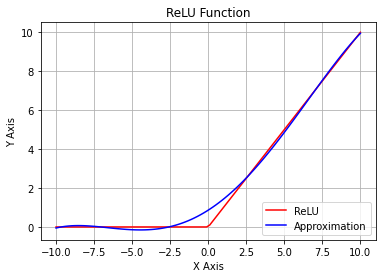

In [13]:
def relu_func(x):
   return np.maximum(0,x)
    

def chebyshev_approx(function, intr, deg=5, prec=15):
    n = deg + 1

    x, u = symbols('x u')

    a, b = intr
    x_to_u = (2 * x - a - b) / (b - a)
    u_to_x = (b - a) / 2 * u + (a + b) / 2
    chebyshev_nodes = cos((symbols('i') + 0.5) / n * pi)

    result_u = [ chebyshev_nodes.evalf(prec, subs={'i': i}) for i in range(n) ]
    result_x = [ u_to_x.evalf(prec, subs={u: i}) for i in result_u ]
    result_y = [ function(i) for i in result_x ]

    t = [One(), u]

    for _ in range(n-2):
        t.append(2 * u * t[-1] - t[-2])

    c = [ sum(result_y) / n ]

    for index in range(1, n):
        c.append( 2 * sum(t[index].evalf(prec, subs={u: i}) * j for i, j in zip(result_u, result_y)) / n )

    y = 1 * c[0]

    for i in range(1, n):
        y += t[i] * c[i]

    y = y.subs({u: x_to_u}).simplify()

    f = lambdify(x, y)
    
    f.formula = y

    return f


f = chebyshev_approx(relu_func, (-10, 10), 5)


x = np.linspace(-10, 10, 100) 

# For Relu
z=np.maximum(0,x)
# y=2.368475785867e-19*x**5 - 0.000252624921308674*x**4 - 2.90138283768708e-17*x**3 + 0.0660873211772537*x**2 + 0.500000000000001*x + 0.862730150341736
# y=2.30556314780491e-19*x**5 - 0.000250098672095587*x**4 - 2.83384427035571e-17*x**3 + 0.0654264479654812*x**2 + 0.505000000000001*x + 0.854102848838318

y=f(x)


# y=str(f.formula)
# y=eval(y)
# print(y)
# print('y',y.shape)  
# a= np.float(-8.606e−10)*x^3+ (1.330e−17)*x^2+ 0.001*x+ 0.499
# prepare the plot, associate the color r(ed) or b(lue) and the label 
plt.plot(x, z, 'r', label='ReLU')
plt.plot(x, y, 'b', label='Approximation')
# plt.plot(x, a, 'o', label='Previous')
plt.grid()
plt.title('ReLU Function')
plt.legend(loc='lower right')
# plt.plot(x)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
# create the graph
plt.savefig("Relu_3_10.png")
plt.show()


In [33]:
 # Training Parameters
lr = 0.01
epochs = 10000
batch_size = 120
step_taken = 100

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
ic(X)
Y = tf.placeholder(tf.float32, [None, num_classes])
ic(Y)
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability) 

ic| X: <tf.Tensor 'Placeholder_3:0' shape=(?, 784) dtype=float32>
ic| Y: <tf.Tensor 'Placeholder_4:0' shape=(?, 10) dtype=float32>


In [34]:
def conv2d(x, W, b, strides=1):

    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    
    return x

def meanpool2d(x, k=2):
    
    return tf.nn.avg_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')
def approxfunc(x):
  return 2.368475785867e-19*x**5 - 0.000252624921308674*x**4 - 2.90138283768708e-17*x**3 + 0.0660873211772537*x**2 + 0.500000000000001*x + 0.862730150341736
  # return 0.0012* (x ** x) + 0.5 * x + 52
    
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1_ = conv2d(x, weights['wc1'], biases['bc1'])
#     conv1_ = tf.nn.relu(conv1_)
    conv1_=approxfunc(conv1_)
    conv1 = meanpool2d(conv1_, k=2)
    
    conv2_ = conv2d(conv1, weights['wc2'], biases['bc2'])
#     conv2_ = tf.nn.relu(conv2_)
#     conv2_=approxfunc(conv2_)
    conv2 = meanpool2d(conv2_, k=2)

    # conv3_ = conv2d(conv2, weights['wc3'], biases['bc3'])
    # conv3 = meanpool2d(conv3_, k=2)

    # # ADD ANOTHER CONV LAYER HERE WITH WEIGHTS AND BIASES TO BE DEFINED
    # conv4_ = conv2d(conv2, weights['wc4'], biases['bc4'])
    # conv4 = meanpool2d(conv4_, k=2)

    # conv5_ = conv2d(conv2, weights['wc5'], biases['bc5'])
    # conv5 = meanpool2d(conv4_, k=2)
    
    fc1_ = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1_, weights['wd1']), biases['bd1'])
    #fc1=tf.nn.relu(fc1)
    fc1 = approxfunc(fc1)
    # Apply Dropout
    fc1_2 = tf.nn.dropout(fc1, dropout)
    
    dict_values = {}
    dict_values['conv1'] = conv1_
    dict_values['conv1mp'] = conv1
    dict_values['conv2'] = conv2_
    dict_values['conv2mp'] = conv2
    # check['conv3'] = conv3_
    # check['conv3mp'] = conv3
    dict_values['fc1_reshape'] = fc1_
    dict_values['fc1_wb'] = fc1
    dict_values['fc1_drp'] = fc1_2

    pred_out = tf.add(tf.matmul(fc1_2, weights['out']), biases['out'])
    return pred_out, dict_values

In [35]:
weights = {
    # 5x5 conv, 1 input, 5 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 5])),
    # 5x5 conv, 5 inputs, 10 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 5, 10])),
        # 5x5 conv, 5 inputs, 10 outputs
    # 'wc3': tf.Variable(tf.random_normal([5, 5, 10, 10])),

    # # DEFINE THE WEIGHTS OF THE CONV LAYER HERE. THE SHAPE OF THE WEIGHTS IS [HEIGHT X WIDTH X NUM_INPUTS X NUM_OUTPUTS]
    # 'wc4': tf.Variable(tf.random_normal([7, 7, 10, 10])),
    # 'wc5': tf.Variable(tf.random_normal([16, 32, 10, 10])),
    
    # fully connected, 7*7*10 inputs, 128 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*10, 128])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([128, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([5])),
    'bc2': tf.Variable(tf.random_normal([10])),
    'bc3': tf.Variable(tf.random_normal([10])),

    # # DEFNE THE BIASES OF THE CONV LAYER HERE. THE SHAPE IS [NUM_OUTPUTS]
    # 'bc4': tf.Variable(tf.random_normal([10])),
    # 'bc5': tf.Variable(tf.random_normal([10])),

    'bd1': tf.Variable(tf.random_normal([128])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Construct model
logits,verify = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))



sess = tf.Session()
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
# Run the initializer
sess.run(init)

In [36]:
# Start training
import numpy as np
for step in range(1, epochs+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % step_taken == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

# Calculate accuracy for 256 MNIST test images
print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: mnist.test.images[:],
                                  Y: mnist.test.labels[:],
                                  keep_prob: 1.0}))

Step 1, Minibatch Loss= 752654912.0000, Training Accuracy= 0.058
Step 100, Minibatch Loss= 461112.6562, Training Accuracy= 0.650
Step 200, Minibatch Loss= 272872.9062, Training Accuracy= 0.683
Step 300, Minibatch Loss= 133029.2969, Training Accuracy= 0.792
Step 400, Minibatch Loss= 144211.6094, Training Accuracy= 0.858
Step 500, Minibatch Loss= 84670.0469, Training Accuracy= 0.842
Step 600, Minibatch Loss= 74222.3594, Training Accuracy= 0.833
Step 700, Minibatch Loss= 89242.8203, Training Accuracy= 0.842


KeyboardInterrupt: 